In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#Importing the dataset as a dataframe
dataSet = pd.read_csv (r'recruitmentdataset-2022-1.3.csv')

#Focus the dataset to our company
dataSet = dataSet.query("company == 'C'")
dataSetC = pd.DataFrame(dataSet, columns=[
    'age',
    'gender',
    'nationality',
    'sport',
    'ind-university_grade',
    'ind-debateclub',
    'ind-programming_exp',
    'ind-international_exp',
    'ind-entrepeneur_exp',
    'ind-languages',
    'ind-exact_study',
    'ind-degree',
    'decision'
])
print(dataSetC)

2022-10-20 22:32:35.859221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 22:32:36.017358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-20 22:32:36.017379: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-20 22:32:36.043962: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-20 22:32:36.628757: W tensorflow/stream_executor/platform/de

      age  gender nationality     sport  ind-university_grade  ind-debateclub  \
2000   32    male       Dutch     Rugby                    58           False   
2001   26    male       Dutch   Running                    61            True   
2002   25  female       Dutch    Tennis                    61           False   
2003   31  female     Belgian   Cricket                    56           False   
2004   22    male      German   Cricket                    72           False   
...   ...     ...         ...       ...                   ...             ...   
2995   22  female       Dutch  Swimming                    76           False   
2996   26    male     Belgian   Cricket                    65           False   
2997   25    male       Dutch     Rugby                    59            True   
2998   23    male       Dutch  Swimming                    70           False   
2999   28    male     Belgian     Rugby                    49            True   

      ind-programming_exp  

# Initial model on basic choice of indicators on M1

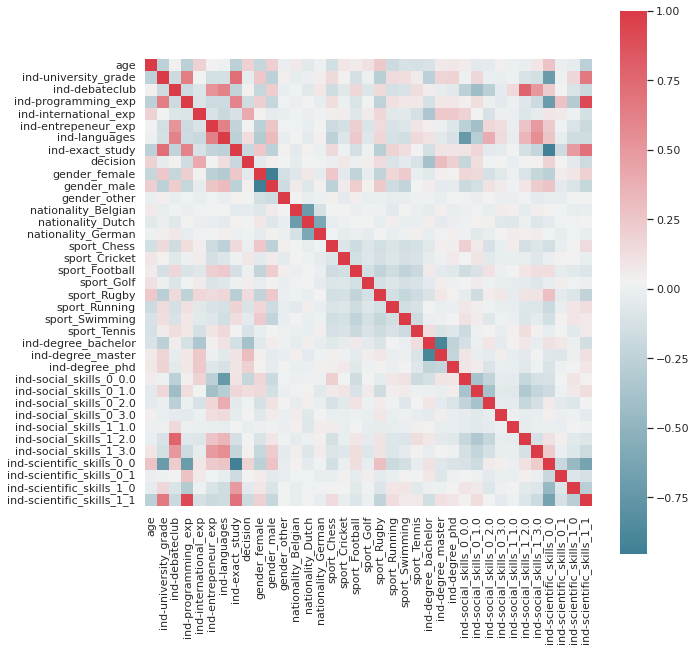

ind-degree_bachelor         -0.393112
ind-social_skills_0_0.0     -0.211386
ind-exact_study             -0.194558
ind-scientific_skills_1_1   -0.174827
ind-programming_exp         -0.159530
sport_Tennis                -0.106545
sport_Running               -0.094424
sport_Swimming              -0.049971
gender_female               -0.049927
ind-scientific_skills_1_0   -0.048084
ind-university_grade        -0.037285
nationality_Belgian         -0.032943
ind-social_skills_1_1.0     -0.022095
sport_Chess                 -0.013728
sport_Football              -0.005183
ind-social_skills_0_2.0      0.011259
nationality_German           0.011614
gender_other                 0.016253
nationality_Dutch            0.017957
ind-social_skills_1_2.0      0.020693
ind-social_skills_0_3.0      0.023006
ind-scientific_skills_0_1    0.024499
ind-entrepeneur_exp          0.027853
ind-social_skills_1_3.0      0.032767
ind-debateclub               0.033267
gender_male                  0.044885
sport_Golf  

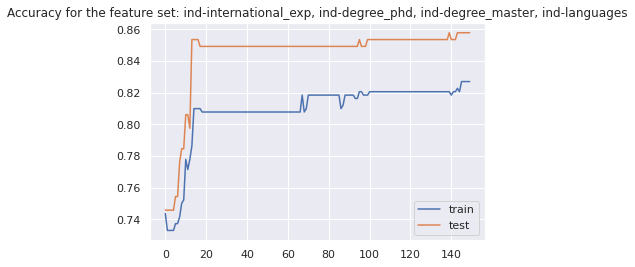

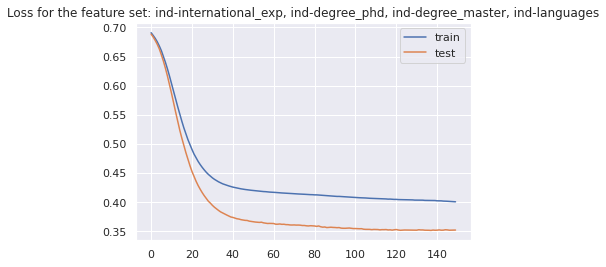

Test loss: 0.38643166422843933
Test accuracy: 0.8399999737739563


In [6]:
labelEncoder = LabelEncoder()

# Convert the following numerical labels from interger to float
conversions = {
    'age' : float,
    'ind-languages' : float,
    'ind-university_grade' : float
}
dataSetC = dataSetC.astype(conversions)
    
# Label Encoder conversion
dataSetC['decision'] = labelEncoder.fit_transform(dataSetC['decision'])
dataSetC['ind-debateclub'] = labelEncoder.fit_transform(dataSetC['ind-debateclub'])
dataSetC['ind-entrepeneur_exp'] = labelEncoder.fit_transform(dataSetC['ind-entrepeneur_exp'])
dataSetC['ind-exact_study'] = labelEncoder.fit_transform(dataSetC['ind-exact_study'])
dataSetC['ind-programming_exp'] = labelEncoder.fit_transform(dataSetC['ind-programming_exp'])
dataSetC['ind-international_exp'] = labelEncoder.fit_transform(dataSetC['ind-international_exp'])    


# One Hot Encoding conversion for gender, sport and degree
dataSetC = pd.get_dummies(dataSetC)

# Scale our data 
scaler = StandardScaler()
dataSetCNew = pd.DataFrame(scaler.fit_transform(dataSetC), columns= dataSetC.columns)

# Evaluating correlations in order to potentially find good combinations of features
corr = dataSetCNew.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, mask=np.zeros_like(corr), cmap=seaborn.diverging_palette(220, 10, as_cmap=True),
            square=True)
plt.show()            
ranking = corr['decision']
ranking = ranking.sort_values()
ranking.name = "Ranking of the predictive power of indicators"
print(ranking)

#Separate training features from target
training = pd.DataFrame(dataSetCNew, columns=['ind-international_exp', 'ind-degree_phd', 'ind-degree_master', 'ind-languages'])
target = dataSetC['decision']
print(target)

#splitting dataset: training and test set, where 80% of the data is in the training set
x_train, x_test, y_train, y_test = train_test_split(training, target, test_size = 0.3, random_state = 0)

#initializing ANN
classifier = Sequential()

#adding the input layer and hidden layer
classifier.add(Dense(6, kernel_initializer='uniform', activation = 'relu', input_dim = 4))
#output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = classifier.fit(x_train, y_train, validation_split=0.33, epochs=150)


score = classifier.evaluate(x_test, y_test, verbose=0)
plt.title('Accuracy for the feature set: ind-international_exp, ind-degree_phd, ind-degree_master, ind-languages')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

plt.title('Loss for the feature set: ind-international_exp, ind-degree_phd, ind-degree_master, ind-languages')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

print('Test loss:', score[0])
print('Test accuracy:', score[1])


# Testing M1 section

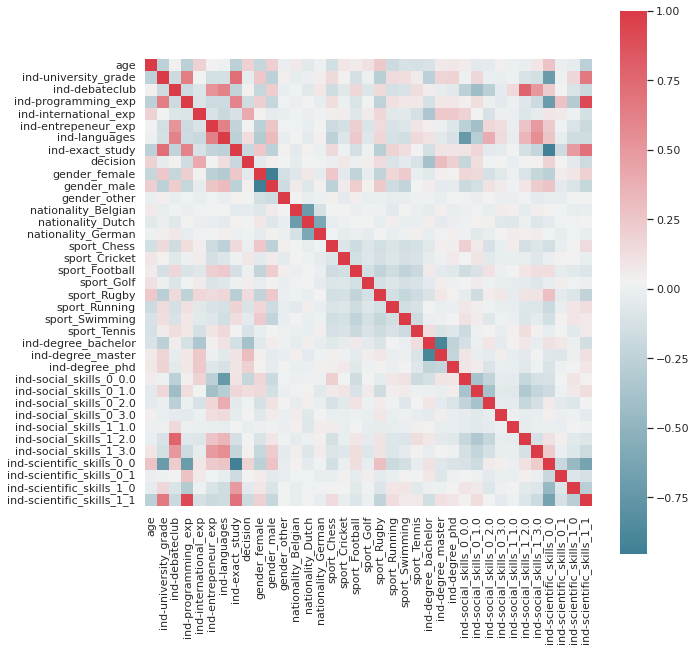

ind-degree_bachelor         -0.393112
ind-social_skills_0_0.0     -0.211386
ind-exact_study             -0.194558
ind-scientific_skills_1_1   -0.174827
ind-programming_exp         -0.159530
sport_Tennis                -0.106545
sport_Running               -0.094424
sport_Swimming              -0.049971
gender_female               -0.049927
ind-scientific_skills_1_0   -0.048084
ind-university_grade        -0.037285
nationality_Belgian         -0.032943
ind-social_skills_1_1.0     -0.022095
sport_Chess                 -0.013728
sport_Football              -0.005183
ind-social_skills_0_2.0      0.011259
nationality_German           0.011614
gender_other                 0.016253
nationality_Dutch            0.017957
ind-social_skills_1_2.0      0.020693
ind-social_skills_0_3.0      0.023006
ind-scientific_skills_0_1    0.024499
ind-entrepeneur_exp          0.027853
ind-social_skills_1_3.0      0.032767
ind-debateclub               0.033267
gender_male                  0.044885
sport_Golf  

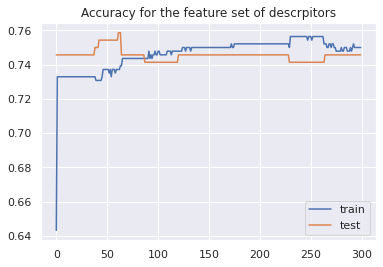

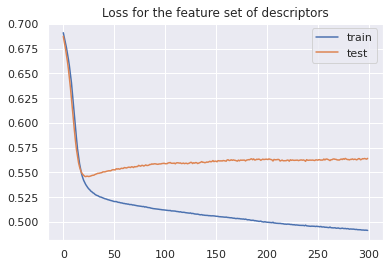

Test loss: 0.5830615758895874
Test accuracy: 0.746666669845581


In [7]:
labelEncoder = LabelEncoder()

# Convert the following numerical labels from interger to float
conversions = {
    'age' : float,
    'ind-languages' : float,
    'ind-university_grade' : float
}
dataSetC = dataSetC.astype(conversions)
    
# Label Encoder conversion
dataSetC['decision'] = labelEncoder.fit_transform(dataSetC['decision'])
dataSetC['ind-debateclub'] = labelEncoder.fit_transform(dataSetC['ind-debateclub'])
dataSetC['ind-entrepeneur_exp'] = labelEncoder.fit_transform(dataSetC['ind-entrepeneur_exp'])
dataSetC['ind-exact_study'] = labelEncoder.fit_transform(dataSetC['ind-exact_study'])
dataSetC['ind-programming_exp'] = labelEncoder.fit_transform(dataSetC['ind-programming_exp'])
dataSetC['ind-international_exp'] = labelEncoder.fit_transform(dataSetC['ind-international_exp'])    


# One Hot Encoding conversion for gender, sport and degree
dataSetC = pd.get_dummies(dataSetC)

# Scale our data 
scaler = StandardScaler()
dataSetCNew = pd.DataFrame(scaler.fit_transform(dataSetC), columns= dataSetC.columns)

# Evaluating correlations in order to potentially find good combinations of features
corr = dataSetCNew.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, mask=np.zeros_like(corr), cmap=seaborn.diverging_palette(220, 10, as_cmap=True),
            square=True)

plt.show()            
ranking = corr['decision']
ranking = ranking.sort_values()
ranking.name = "Ranking of the predictive power of indicators"
print(ranking)

#Separate training features from target
training = pd.DataFrame(dataSetCNew, columns=['sport_Tennis', 'sport_Running', 'sport_Swimming', 'gender_female', 'nationality_Belgian',
                                                'sport_Chess', 'sport_Football', 'nationality_German', 'gender_other', 'nationality_Dutch',
                                                'gender_male', 'sport_Golf', 'sport_Cricket', 'sport_Rugby', 'age'])
target = dataSetC['decision']
print(target)

#splitting dataset: training and test set, where 80% of the data is in the training set
x_train, x_test, y_train, y_test = train_test_split(training, target, test_size = 0.3, random_state = 0)

#initializing ANN
classifier = Sequential()

#adding the input layer and hidden layer
classifier.add(Dense(6, kernel_initializer='uniform', activation = 'relu', input_dim = 15))
#output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = classifier.fit(x_train, y_train, validation_split=0.33, epochs=300)

plt.title('Accuracy for the feature set of descrpitors')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

plt.title('Loss for the feature set of descriptors')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
score = classifier.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Random sampling of IND indicators for training M1

ind-degree_bachelor     -0.393112
ind-exact_study         -0.194558
ind-programming_exp     -0.159530
sport_Tennis            -0.106545
sport_Running           -0.094424
sport_Swimming          -0.049971
gender_female           -0.049927
ind-university_grade    -0.037285
nationality_Belgian     -0.032943
sport_Chess             -0.013728
sport_Football          -0.005183
nationality_German       0.011614
gender_other             0.016253
nationality_Dutch        0.017957
ind-entrepeneur_exp      0.027853
ind-debateclub           0.033267
gender_male              0.044885
sport_Golf               0.047959
sport_Cricket            0.077263
ind-languages            0.132866
sport_Rugby              0.144615
age                      0.194080
ind-degree_phd           0.202932
ind-degree_master        0.303153
ind-international_exp    0.406178
decision                 1.000000
Name: Ranking of the predictive power of indicators, dtype: float64
Index(['ind-international_exp', 'ind-languages',

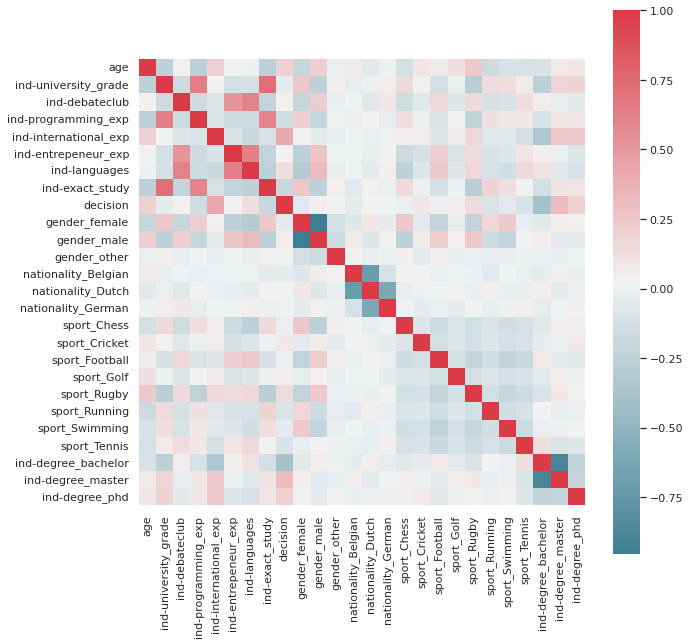

In [4]:
labelEncoder = LabelEncoder()

# Convert the following numerical labels from interger to float
conversions = {
    'age' : float,
    'ind-languages' : float,
    'ind-university_grade' : float
}
dataSetC = dataSetC.astype(conversions)
    
# Label Encoder conversion
dataSetC['decision'] = labelEncoder.fit_transform(dataSetC['decision'])
dataSetC['ind-debateclub'] = labelEncoder.fit_transform(dataSetC['ind-debateclub'])
dataSetC['ind-entrepeneur_exp'] = labelEncoder.fit_transform(dataSetC['ind-entrepeneur_exp'])
dataSetC['ind-exact_study'] = labelEncoder.fit_transform(dataSetC['ind-exact_study'])
dataSetC['ind-programming_exp'] = labelEncoder.fit_transform(dataSetC['ind-programming_exp'])
dataSetC['ind-international_exp'] = labelEncoder.fit_transform(dataSetC['ind-international_exp'])    


# One Hot Encoding conversion for gender, sport and degree
dataSetC = pd.get_dummies(dataSetC)

# Scale our data 
scaler = StandardScaler()
dataSetCNew = pd.DataFrame(scaler.fit_transform(dataSetC), columns= dataSetC.columns)

# Evaluating correlations in order to potentially find good combinations of features
corr = dataSetCNew.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, mask=np.zeros_like(corr), cmap=seaborn.diverging_palette(220, 10, as_cmap=True),
            square=True)
            
ranking = corr['decision']
ranking = ranking.sort_values()
ranking.name = "Ranking of the predictive power of indicators"
print(ranking)

#Separate training features from target
training = dataSetCNew.filter(like='ind').sample(n=4,axis='columns')
target = dataSetC['decision']
print(training.columns)

#splitting dataset: training and test set, where 80% of the data is in the training set
x_train, x_test, y_train, y_test = train_test_split(training, target, test_size = 0.3, random_state = 0)

#initializing ANN
classifier = Sequential()

#adding the input layer and hidden layer
classifier.add(Dense(6, kernel_initializer='uniform', activation = 'relu', input_dim = 4))
#output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
classifier.fit(x_train, y_train, validation_split=0.33, epochs=150)


score = classifier.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Evaluating combinations of indicators for higher correlations

ind-degree_bachelor         -0.393112
ind-social_skills_0_0.0     -0.211386
ind-scientific_skills_1_1   -0.174827
sport_Tennis                -0.106545
sport_Running               -0.094424
sport_Swimming              -0.049971
gender_female               -0.049927
ind-scientific_skills_1_0   -0.048084
ind-university_grade        -0.037285
nationality_Belgian         -0.032943
ind-social_skills_1_1.0     -0.022095
sport_Chess                 -0.013728
sport_Football              -0.005183
ind-social_skills_0_2.0      0.011259
nationality_German           0.011614
gender_other                 0.016253
nationality_Dutch            0.017957
ind-social_skills_1_2.0      0.020693
ind-social_skills_0_3.0      0.023006
ind-scientific_skills_0_1    0.024499
ind-entrepeneur_exp          0.027853
ind-social_skills_1_3.0      0.032767
gender_male                  0.044885
sport_Golf                   0.047959
sport_Cricket                0.077263
ind-social_skills_0_1.0      0.127818
sport_Rugby 

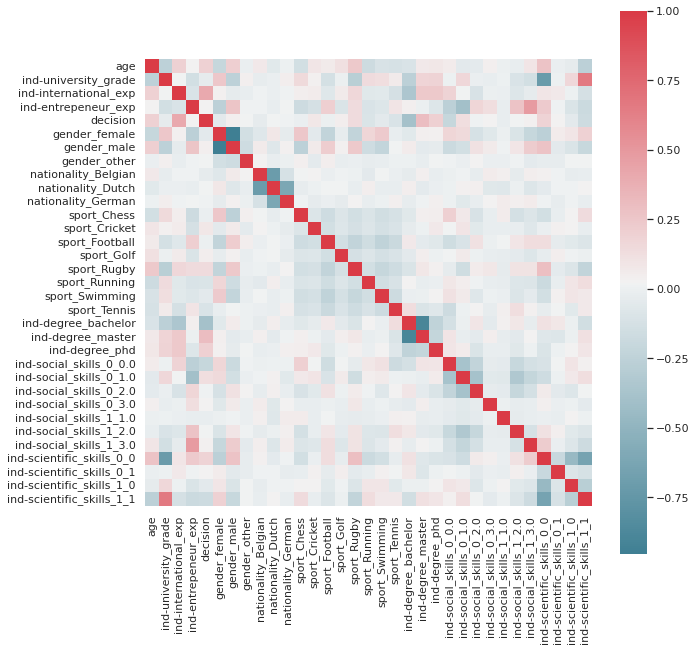

In [5]:
labelEncoder = LabelEncoder()

# Convert the following numerical labels from interger to float
conversions = {
    'age' : float,
    'ind-languages' : float,
    'ind-university_grade' : float
}
dataSetC = dataSetC.astype(conversions)

dataSetC['ind-social_skills'] = dataSetC['ind-debateclub'].astype(str) + "_" + dataSetC['ind-languages'].astype(str)
dataSetC['ind-scientific_skills'] = dataSetC['ind-exact_study'].astype(str) + "_" + dataSetC['ind-programming_exp'].astype(str)

# Label Encoder conversion
dataSetC['decision'] = labelEncoder.fit_transform(dataSetC['decision'])
dataSetC['ind-debateclub'] = labelEncoder.fit_transform(dataSetC['ind-debateclub'])
dataSetC['ind-entrepeneur_exp'] = labelEncoder.fit_transform(dataSetC['ind-entrepeneur_exp'])
dataSetC['ind-exact_study'] = labelEncoder.fit_transform(dataSetC['ind-exact_study'])
dataSetC['ind-programming_exp'] = labelEncoder.fit_transform(dataSetC['ind-programming_exp'])
dataSetC['ind-international_exp'] = labelEncoder.fit_transform(dataSetC['ind-international_exp'])    


# One Hot Encoding conversion for gender, sport and degree
dataSetC = pd.get_dummies(dataSetC)

# Scale our data 
scaler = StandardScaler()
dataSetCNew = pd.DataFrame(scaler.fit_transform(dataSetC), columns= dataSetC.columns)


# print(dataSetCNew)

dataSetCNew = dataSetCNew.drop(labels=['ind-languages', 'ind-debateclub', 'ind-exact_study', 'ind-programming_exp'],axis=1)

# Evaluating correlations in order to potentially find good combinations of features
corr = dataSetCNew.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(corr, mask=np.zeros_like(corr), cmap=seaborn.diverging_palette(220, 10, as_cmap=True),
            square=True)
            
ranking = corr['decision']
ranking = ranking.sort_values()
ranking.name = "Ranking of the predictive power of indicators"
print(ranking)

#Separate training features from target
training = pd.DataFrame(dataSetCNew, columns=['ind-degree_bachelor', 'ind-degree_phd', 'ind-degree_master', 'ind-international_exp'])
target = dataSetC['decision']
print(target)

#splitting dataset: training and test set, where 80% of the data is in the training set
x_train, x_test, y_train, y_test = train_test_split(training, target, test_size = 0.3, random_state = 0)

#initializing ANN
classifier = Sequential()

#adding the input layer and hidden layer
classifier.add(Dense(6, kernel_initializer='uniform', activation = 'relu', input_dim = 4))
#output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
classifier.fit(x_train, y_train, validation_split=0.33, epochs=150)


score = classifier.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])